# Facebook Users by Country Data

In [155]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [109]:

df=pd.read_csv("C:/Users/shakt/OneDrive/Desktop/Data_Sets/fb_usage.csv")
df

,Name,Users,Facebook_Users%,Date_of_Data,Population
0,India,416.6M,29.16%,2021-06,"1,428,627,663"
1,United States,240M,70.59%,2020-12,"339,996,563"
2,Indonesia,176.5M,63.6%,2021-06,"277,534,122"
3,Brazil,139M,64.23%,2020-12,"216,422,446"
4,Philippines,91M,77.55%,2021-06,"117,337,368"
...,...,...,...,...,...
221,Cook Islands,2.7K,15.84%,2020-12,"17,044"
222,Montserrat,2.6K,59.28%,2020-12,"4,386"
223,Niue,820,42.38%,2020-12,"1,935"
224,Vatican City,799,154.25%,2020-12,518


In [89]:
df.count()

Name               226
Users              226
Facebook_Users%    226
Date_of_Data       226
Population         226
dtype: int64

In [90]:
df.duplicated(keep=False).sum()

0

In [91]:
df.isna().sum()

Name               0
Users              0
Facebook_Users%    0
Date_of_Data       0
Population         0
dtype: int64

In [92]:
df.columns

Index(['Name', 'Users', 'Facebook_Users%', 'Date_of_Data', 'Population'], dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             226 non-null    object
 1   Users            226 non-null    object
 2   Facebook_Users%  226 non-null    object
 3   Date_of_Data     226 non-null    object
 4   Population       226 non-null    object
dtypes: object(5)
memory usage: 9.0+ KB


In [118]:
# Building function to convert the df['Users'] column value into the real whole numbers instead of char

def convert_to_wholenumber(value):
    if value.endswith('M'):
        return int(float(value[:-1])*1000000)
    elif value.endswith('K'):
        return int(float(value[:-1])*1000)
    else:
        return int(value)

In [119]:
#apply 'convert_to_wholenumber' function to conver the users in char to whole number
df['Users']=df['Users'].apply(convert_to_wholenumber)

In [120]:
#converting the Population column values as int after removing the comma seperation
df['Population']=df['Population'].str.replace(',','').astype(int)

In [97]:
df

,Name,Users,Facebook_Users%,Date_of_Data,Population
0,India,416600000,29.16%,2021-06,1428627663
1,United States,240000000,70.59%,2020-12,339996563
2,Indonesia,176500000,63.6%,2021-06,277534122
3,Brazil,139000000,64.23%,2020-12,216422446
4,Philippines,91000000,77.55%,2021-06,117337368
...,...,...,...,...,...
221,Cook Islands,2700,15.84%,2020-12,17044
222,Montserrat,2600,59.28%,2020-12,4386
223,Niue,820,42.38%,2020-12,1935
224,Vatican City,799,154.25%,2020-12,518


In [121]:
df['Name'].unique()

array(['India', 'United States', 'Indonesia', 'Brazil', 'Philippines',
       'Mexico', 'Vietnam', 'Thailand', 'Japan', 'Pakistan', 'Egypt',
       'Bangladesh', 'Turkey', 'United Kingdom', 'Iran', 'France',
       'Germany', 'Italy', 'Nigeria', 'Argentina', 'Colombia', 'Malaysia',
       'Spain', 'Saudi Arabia', 'South Korea', 'Iraq', 'Algeria',
       'South Africa', 'Canada', 'Morocco', 'Taiwan', 'Myanmar', 'Peru',
       'Poland', 'Australia', 'Russia', 'Nepal', 'Venezuela', 'Chile',
       'Cambodia', 'Kazakhstan', 'Netherlands', 'Romania', 'Kenya',
       'United Arab Emirates', 'Ecuador', 'Ukraine', 'Sweden', 'Syria',
       'Tunisia', 'Sri Lanka', 'Ghana', 'Portugal', 'Guatemala',
       'Ethiopia', 'Belgium', 'Jordan', 'Israel', 'Hong Kong', 'Bolivia',
       'Hungary', 'Greece', 'Ivory Coast', 'Libya', 'Tanzania',
       'Dominican Republic', 'Austria', 'Singapore', 'Czech Republic',
       'Uzbekistan', 'Azerbaijan', 'Cameroon', 'Kuwait', 'Lebanon',
       'Denmark', 'China'

In [122]:
#top10 countries facebook user counts  out of 226
df_top10_country=df[['Name','Users']].nlargest(10,'Users')
df_top10_country.rename(columns={'Name': 'Country'}, inplace=True)
df_top10_country

,Country,Users
0,India,416600000
1,United States,240000000
2,Indonesia,176500000
3,Brazil,139000000
4,Philippines,91000000
5,Mexico,78000000
6,Vietnam,75900000
7,Thailand,58500000
8,Japan,55800000
9,Pakistan,49200000


In [123]:
#visual representation
fig=px.bar(df_top10_country, x='Country',y='Users', color='Country',text_auto=True,)
fig.update_layout(width=800,height=400,title='Top10 Countries FaceBook User Count')
fig.show()

In [124]:
#top10 countries facebook user counts VS population
df_top10_country_vs_pop=df.sort_values('Users',ascending=False).head(10)
df_top10_country_vs_pop=df_top10_country_vs_pop[['Name','Users','Population']]
df_top10_country_vs_pop.rename(columns={'Name': 'Country'}, inplace=True)
df_top10_country_vs_pop

,Country,Users,Population
0,India,416600000,1428627663
1,United States,240000000,339996563
2,Indonesia,176500000,277534122
3,Brazil,139000000,216422446
4,Philippines,91000000,117337368
5,Mexico,78000000,128455567
6,Vietnam,75900000,98858950
7,Thailand,58500000,71801279
8,Japan,55800000,123294513
9,Pakistan,49200000,240485658


In [125]:
#visual representation
fig=go.Figure()
fig.add_trace(go.Bar(x=df_top10_country_vs_pop['Country'],y=df_top10_country_vs_pop['Users'],name='Users',text=df_top10_country_vs_pop['Users']))
fig.add_trace(go.Bar(x=df_top10_country_vs_pop['Country'],y=df_top10_country_vs_pop['Population'],name='Population',text=df_top10_country_vs_pop['Population']))
fig.update_layout(title='top10 countries facebook user counts VS population',xaxis_title='Country',yaxis_title='Users/Population')
fig.show()

In [126]:
#Bottom10 countries facebook user counts VS population
df_bottom10_country=df[['Name','Users']].nsmallest(10,'Users')
df_bottom10_country.rename(columns={'Name': 'Country'}, inplace=True)
df_bottom10_country

,Country,Users
225,Tokelau,410
224,Vatican City,799
223,Niue,820
222,Montserrat,2600
221,Cook Islands,2700
220,Nauru,2900
218,Saint Pierre And Miquelon,3100
219,Falkland Islands,3100
217,Wallis And Futuna,6000
216,Eritrea,6200


In [140]:
#visual representation
fig=px.bar(df_bottom10_country, x='Country',y='Users', color='Country',text_auto=True,)
fig.update_layout(width=800,height=400,title='Bottom10 countries facebook user counts VS population')
fig.show()

In [141]:
#Bottom10 countries facebook user counts VS population
df_bottom10_country_vs_pop=df.sort_values('Users',ascending=False).nsmallest(10,'Users')
df_bottom10_country_vs_pop=df_bottom10_country_vs_pop[['Name','Users','Population']]
df_bottom10_country_vs_pop.rename(columns={'Name': 'Country'}, inplace=True)
df_bottom10_country_vs_pop

,Country,Users,Population
225,Tokelau,410,1893
224,Vatican City,799,518
223,Niue,820,1935
222,Montserrat,2600,4386
221,Cook Islands,2700,17044
220,Nauru,2900,12780
218,Saint Pierre And Miquelon,3100,5840
219,Falkland Islands,3100,3791
217,Wallis And Futuna,6000,11502
216,Eritrea,6200,3748901


In [142]:
#visual representation
fig=go.Figure()
fig.add_trace(go.Bar(x=df_bottom10_country_vs_pop['Country'],y=df_bottom10_country_vs_pop['Users'],name='Users',text=df_bottom10_country_vs_pop['Users']))
fig.add_trace(go.Bar(x=df_bottom10_country_vs_pop['Country'],y=df_bottom10_country_vs_pop['Population'],name='Population',text=df_bottom10_country_vs_pop['Population']))
fig.update_layout(title='Bottom10 countries facebook user counts VS population',xaxis_title='Country',yaxis_title='Users/Population')
fig.update_yaxes(range=[0, 100000])
fig.show()

In [132]:
#top10 countries Facebook_Users%
df_fb_user_avg=df.sort_values('Facebook_Users%', ascending=False).head(10).reset_index()
df_fb_user_avg

,index,Name,Users,Facebook_Users%,Date_of_Data,Population
0,224,Vatican City,799,154.25,2020-12,518
1,44,United Arab Emirates,10300000,108.40,2021-03,9516871
2,96,Qatar,2900000,108.05,2021-03,2716391
3,146,Brunei,461600,102.01,2021-06,452524
4,116,Bahrain,1500000,100.70,2021-03,1485509
5,72,Kuwait,4200000,98.07,2021-03,4310108
6,170,Guam,149500,86.44,2020-12,172952
7,90,Georgia,3200000,86.42,2021-06,3728282
8,30,Taiwan,20600000,86.15,2021-06,23923276
9,181,Aruba,91000,85.63,2020-12,106277


=> We have Facebook_Users% goes beyond 100% for 5 contries that would be due to many users would have more than one accounts.


# Clearing Outliers

In [134]:
# I would remove all the countries which have Facebook_Users% greater than 100%
df_user_per=df[df['Facebook_Users%']<=100]
df_user_per

,Name,Users,Facebook_Users%,Date_of_Data,Population
0,India,416600000,29.16,2021-06,1428627663
1,United States,240000000,70.59,2020-12,339996563
2,Indonesia,176500000,63.60,2021-06,277534122
3,Brazil,139000000,64.23,2020-12,216422446
4,Philippines,91000000,77.55,2021-06,117337368
...,...,...,...,...,...
220,Nauru,2900,22.69,2020-12,12780
221,Cook Islands,2700,15.84,2020-12,17044
222,Montserrat,2600,59.28,2020-12,4386
223,Niue,820,42.38,2020-12,1935


In [144]:
#Top10 countries Facebook_Users%
df_fb_user_avg_updated=df_user_per.sort_values('Facebook_Users%', ascending=False).head(10).reset_index(drop=True)
df_fb_user_avg_updated=df_fb_user_avg_updated[['Name','Facebook_Users%']]
df_fb_user_avg_updated

,Name,Facebook_Users%
0,Kuwait,98.07
1,Guam,86.44
2,Georgia,86.42
3,Taiwan,86.15
4,Aruba,85.63
5,Libya,85.03
6,Singapore,83.06
7,Malaysia,83.04
8,Hong Kong,82.29
9,Falkland Islands,81.77


In [137]:
#visual representation
fig=px.bar(df_fb_user_avg_updated, x='Name',y='Facebook_Users%', color='Name',text_auto=True,)
fig.update_layout(width=800,height=400,title='Top10 countries Facebook_Users%')
fig.show()

In [145]:
#Bottom10 countries Facebook_Users%
df_fb_user_avg_updated_l10=df_user_per.sort_values('Facebook_Users%', ascending=False).nsmallest(10,'Facebook_Users%').reset_index(drop=True)
df_fb_user_avg_updated_l10=df_fb_user_avg_updated_l10[['Name','Facebook_Users%']]
df_fb_user_avg_updated_l10

,Name,Facebook_Users%
0,North Korea,0.05
1,Eritrea,0.17
2,China,0.27
3,Niger,2.12
4,Central African Republic,2.36
5,Chad,2.42
6,Sudan,2.70
7,Malawi,3.05
8,Turkmenistan,3.45
9,Dr Congo,3.72


In [146]:
#visual representation
fig=px.bar(df_fb_user_avg_updated_l10, x='Name',y='Facebook_Users%', color='Name',text_auto=True,)
fig.update_layout(width=800,height=400,title='Bottom10 countries Facebook_Users%')
fig.show()

In [149]:

df_cor=df[['Name','Users','Facebook_Users%','Population']]
df_cor

,Name,Users,Facebook_Users%,Population
0,India,416600000,29.16,1428627663
1,United States,240000000,70.59,339996563
2,Indonesia,176500000,63.60,277534122
3,Brazil,139000000,64.23,216422446
4,Philippines,91000000,77.55,117337368
...,...,...,...,...
221,Cook Islands,2700,15.84,17044
222,Montserrat,2600,59.28,4386
223,Niue,820,42.38,1935
224,Vatican City,799,154.25,518


In [154]:
#Correlation
corr=df_cor.corr()
corr

,Users,Facebook_Users%,Population
Users,1.000000,0.072438,0.675811
Facebook_Users%,0.072438,1.000000,-0.139506
Population,0.675811,-0.139506,1.000000


<AxesSubplot:>

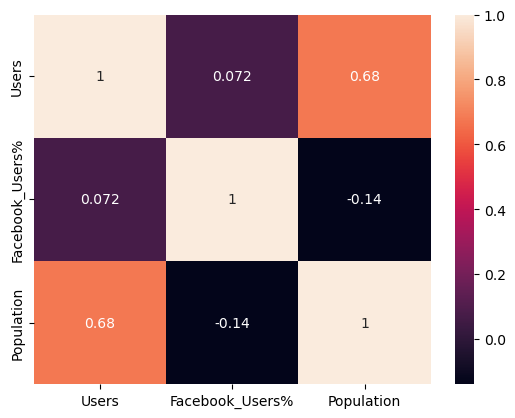

In [152]:
import seaborn as sns
sns.heatmap(corr,annot=True)

Findings:

=> Countries with larger population has higher Facebook users
=> Countries with Larger population have lower percentage of Facebook user % (users/population*100)
=> Countries with more Facebook users have slighly higher percentage of Facebook user %.

Area of improvement:

-Countries population and no.of users have positive relationship but it is not very strong so it can be increased furthermore applying new features and data privacy to retain exisng users and attract new users to increase facebook users percentage

-Since larger population countries produce more facebook users , target them to increase furthermore

-China is the largest populated country so targetting it by ensuring some areas such as security, misinformation, data privacy to increase facebook users from there.

Acheivement: Digital Marketing, digital sales, Online shopping and etc..
